#SB-SAT Analysis of annotated test
Download data from: https://github.com/ahnchive/SB-SAT/

Analysis of the texts after annotation!!
- Text length, word length etc. for dataset chapter
- Annotations -> to get description for features for methods chapter
- Other information in this dataframe (e.g. participant age, sex, ...) is analysed in ahn_SB-SAT_analysis_fixation_labels.ipynb (raw data before annotation)
## 0. Load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# filenames
path_texts = "/content/drive/MyDrive/_Masterarbeit/SBSAT_Data/SBSAT_annotated.csv"

# helper functions

In [ ]:
def get_columns(df):
  """Function to get all column labels of a pd dataframe."""
  column_names = list(df.columns.values)
  data_types = list(df.dtypes)

  columns = []
  i = 1
  for column, dtype in zip(column_names, data_types): 
    columns.append(''.join(["Column ", str(i),":\t", column, "\t(",str(dtype),")"]))
    i+=1
    
  return columns

## check out data

In [ ]:
df = pd.read_csv(path_texts)

In [ ]:
df.head()

,Unnamed: 0,text_number,screen_number,sentence_number,text_str,w_in_sent_id,word,lemma,word_n_char,pos,...,t_adv_TTR,t_genre,tf,idf,tf_idf,lex_overlap,semantic_similarity_adjacent_sent,pron_det_to_noun_ratio,voice,word_in_screen_id
0,0,1,1,1,Even then my only friends were made of paper a...,1,Even,even,4,ADV,...,0.7941,fiction,0.0909,2.8034,0.2548,0,11,0.00,passive,1
1,1,1,1,1,Even then my only friends were made of paper a...,2,then,then,4,ADV,...,0.7941,fiction,0.0909,3.4965,0.3178,0,11,0.00,passive,2
2,2,1,1,1,Even then my only friends were made of paper a...,3,my,my,2,PRON,...,0.7941,fiction,0.0909,0.9316,0.0847,0,11,0.25,passive,3
3,3,1,1,1,Even then my only friends were made of paper a...,4,only,only,4,ADJ,...,0.7941,fiction,0.0909,2.3979,0.2180,0,11,0.00,passive,4
4,4,1,1,1,Even then my only friends were made of paper a...,5,friends,friend,7,NOUN,...,0.7941,fiction,0.0909,1.7047,0.1550,0,11,0.00,passive,5


In [ ]:
for c in get_columns(df):
  print(c)

Column 1:	Unnamed: 0	(int64)
Column 2:	text_number	(int64)
Column 3:	screen_number	(int64)
Column 4:	sentence_number	(int64)
Column 5:	text_str	(object)
Column 6:	w_in_sent_id	(int64)
Column 7:	word	(object)
Column 8:	lemma	(object)
Column 9:	word_n_char	(int64)
Column 10:	pos	(object)
Column 11:	simplified_pos	(object)
Column 12:	wordfreq_lemma	(float64)
Column 13:	NE_IOB	(object)
Column 14:	NE_label	(object)
Column 15:	content_word	(bool)
Column 16:	technical_term	(bool)
Column 17:	synonym_homonym	(bool)
Column 18:	Case	(object)
Column 19:	Gender	(object)
Column 20:	Number	(object)
Column 21:	Person	(float64)
Column 22:	PronType	(object)
Column 23:	Mood	(object)
Column 24:	Tense	(object)
Column 25:	VerbForm	(object)
Column 26:	Definite	(object)
Column 27:	PunctType	(object)
Column 28:	Degree	(object)
Column 29:	Abbr	(float64)
Column 30:	Poss	(object)
Column 31:	Prefix	(float64)
Column 32:	Reflex	(object)
Column 33:	synt_surprisal	(float64)
Column 34:	surprisal_bert	(float64)
Column 3

In [ ]:
df_dickens = df[df['text_number'] == 1]
df_flytrap = df[df['text_number'] == 2]
df_genome = df[df['text_number'] == 3]
df_northpole = df[df['text_number'] == 4]

## 1. Stats
Number of word in text, mean word length etc. 

In [ ]:
def get_stats(df): 
  #print("Dataframe: ", df)

  print("\nStats on text level: ")
  print("Number of screens: ", len(df['screen_number'].unique()))
  print("Number of words in the text: ", df['t_n_words'].unique())
  print("Number of chars in the text: ", df['t_n_char'].unique())
  print("Mean word length in the text: ", df['t_mean_word_length'].unique())

  print("Number of words per screen: ")
  print(df.groupby("screen_number")['w_in_sent_id'].max())

  return None

In [ ]:
print("Dickens: ")
print(get_stats(df_dickens))

Dickens: 

Stats on text level: 
Number of screens:  5
Number of words in the text:  [634]
Number of chars in the text:  [2589]
Mean word length in the text:  [4.084]
Number of words per screen: 
screen_number
1    50
2    41
3    43
4    34
5    59
Name: w_in_sent_id, dtype: int64
None


In [ ]:
print("Flytrap: ")
print(get_stats(df_flytrap))

Flytrap: 

Stats on text level: 
Number of screens:  6
Number of words in the text:  [700]
Number of chars in the text:  [3473]
Mean word length in the text:  [4.961]
Number of words per screen: 
screen_number
1    42
2    34
3    39
4    73
5    37
6    29
Name: w_in_sent_id, dtype: int64
None


In [ ]:
print("Genome: ")
print(get_stats(df_genome))

Genome: 

Stats on text level: 
Number of screens:  6
Number of words in the text:  [591]
Number of chars in the text:  [3075]
Mean word length in the text:  [5.203]
Number of words per screen: 
screen_number
1    24
2    40
3    31
4    27
5    31
6    27
Name: w_in_sent_id, dtype: int64
None


In [ ]:
print("Northpole: ")
print(get_stats(df_northpole))

Northpole: 

Stats on text level: 
Number of screens:  5
Number of words in the text:  [558]
Number of chars in the text:  [2513]
Mean word length in the text:  [4.504]
Number of words per screen: 
screen_number
1    35
2    42
3    45
4    24
5    22
Name: w_in_sent_id, dtype: int64
None


In [ ]:
# word length in number of chars
print("Number of chars/word:")
df.groupby('text_number')['word_n_char'].describe()

Number of chars/word:


,count,mean,std,min,25%,50%,75%,max
text_number,,,,,,,,
1,634.0,3.968454,2.202027,1.0,2.0,4.0,5.0,16.0
2,700.0,4.872857,2.537751,1.0,3.0,4.0,6.0,18.0
3,591.0,5.057530,2.780697,1.0,3.0,4.0,7.0,16.0
4,558.0,4.396057,2.632306,1.0,2.0,4.0,6.0,14.0


In [ ]:
"Sentence length: Number of words/sentence and number of chars/sentence"
df.groupby('text_number')[['sent_n_words', 'sent_n_char']].describe()

sent_n_words                                                     \
                   count       mean        std  min   25%   50%   75%   max   
text_number                                                                   
1                  634.0  32.537855  16.785779  4.0  18.0  32.0  43.0  65.0   
2                  700.0  35.261429  16.998239  6.0  23.0  35.0  40.0  78.0   
3                  591.0  24.927242   9.385878  6.0  19.0  22.0  32.0  45.0   
4                  558.0  28.231183  12.723349  3.0  19.0  24.0  37.0  48.0   

            sent_n_char                                                     \
                  count        mean         std   min    25%    50%    75%   
text_number                                                                  
1                 634.0  152.004732   79.953590  19.0   88.0  151.0  191.0   
2                 700.0  196.797143  103.701931  41.0  135.0  178.0  214.0   
3                 591.0  136.379019   47.273548  27.0   99.0  133.0  172.0   
4                 558.0  144.215054   70.256343  11.0   98.0  116.0  180.0   

                    
               max  
text_number         
1            301.0  
2            467.0  
3            213.0  
4            270.0

In [ ]:
# number of sentences in text
n_sent_dickens = df_dickens.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
n_sent_flytrap = df_flytrap.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
n_sent_genome = df_genome.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
n_sent_northpole = df_northpole.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
print("Dickens: ", n_sent_dickens)
print("Flytrap: ", n_sent_flytrap)
print("Genome: ", n_sent_genome)
print("Northpole: ", n_sent_northpole)

Dickens:  33
Flytrap:  31
Genome:  37
Northpole:  33


Some plots about the stats above...

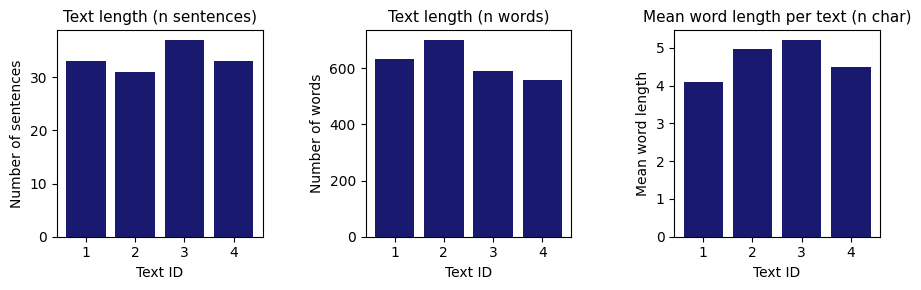

<Figure size 640x480 with 0 Axes>

In [ ]:
# text lenth in n sents and n words; Mean word length (n char)
names = ['1', '2', '3', '4']
n_sents = [33, 31, 37, 33]
n_words = [634, 700, 591, 558]
mean_word_len = [4.08, 4.96, 5.2, 4.5]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, n_sents, color='midnightblue')
plt.xlabel('Text ID')
plt.ylabel('Number of sentences')
plt.title('Text length (n sentences)', fontsize=11)

plt.subplot(132)
plt.bar(names, n_words, color='midnightblue')
plt.xlabel('Text ID')
plt.ylabel('Number of words')
plt.title('Text length (n words)', fontsize=11)

plt.subplot(133)
plt.bar(names, mean_word_len, color='midnightblue')
plt.xlabel('Text ID')
plt.ylabel('Mean word length')
plt.title('Mean word length per text (n char)', fontsize=11)

#plt.suptitle('SB-SAT Texts: Stats')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.savefig('sbsat_text_stats.png')

Text length in number of sentences and number of words and mean word length per Text. Text IDs correlate with the text names as follows: 1: Dickens, 2: Flytrap, 3: Genome, 4: Northpole. <br>
Texts 1 and 4 are displayed on 5 screens each while texts 2 and 3 are displayed on 6 screens. Text 2 has more words than the other sentences, but fewer sentences, meaning that it has longer sentences than the other texts. Text 3 has more shorter sentences. The mean word length per text is biggest in the two technical texts, which will probably have implications on the text difficulty as well. 

# Annnotations


##POS, content word, NE, IOB

In [ ]:
# counts for POS, simplified POS and content word tags/text
print("Pos tag counts/text")
df.groupby('text_number')[['pos', 'simplified_pos', 'content_word']].value_counts()

Pos tag counts/text


text_number  pos    simplified_pos  content_word
1            PRON   FUNC            False           113
             NOUN   N               True            103
             VERB   VERB            True             90
             ADP    FUNC            False            58
             DET    FUNC            False            56
             AUX    FUNC            False            41
             ADV    A               True             38
             ADJ    A               True             32
             SCONJ  FUNC            False            30
             CCONJ  FUNC            False            26
             PROPN  N               True             19
             PART   FUNC            False            18
             NUM    FUNC            False             7
             PUNCT  FUNC            False             3
2            NOUN   N               True            172
             DET    FUNC            False           102
             VERB   VERB            True             96

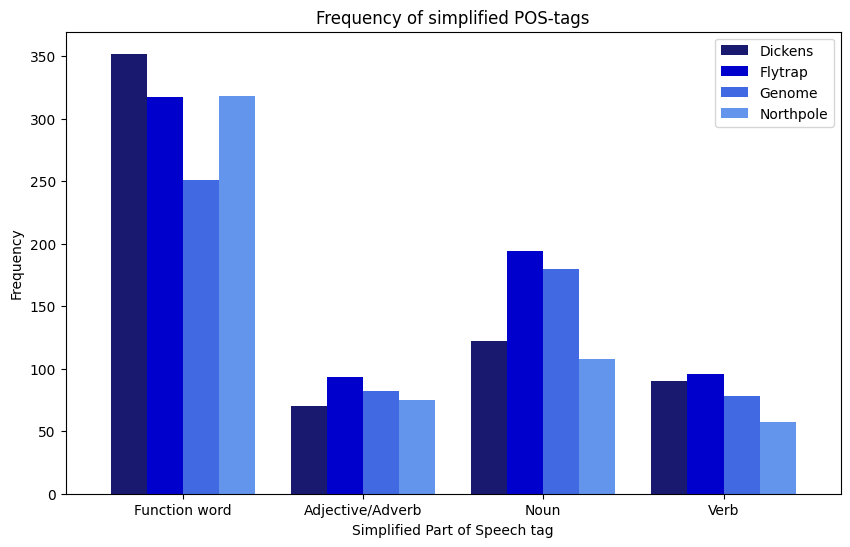

In [ ]:
# bar plot for simplified POS tags
import matplotlib.pyplot as plt

# Create a pivot table with the count of each tag for each text
pivot_table = df.pivot_table(index='simplified_pos', columns='text_number', aggfunc='size', fill_value=0)

# Extract the "FUNC" row, remove it from the pivot table, and concatenate it back as the first row
func_row = pivot_table.loc['FUNC']
pivot_table = pivot_table.drop('FUNC')
pivot_table = pd.concat([func_row.to_frame().T, pivot_table], axis=0)

new_labels = ['Function word', 'Adjective/Adverb', 'Noun', 'Verb']
colors = ['midnightblue', 'mediumblue', 'royalblue', 'cornflowerblue']
# Create a bar chart of the pivot table with narrower bar width
ax=pivot_table.plot(kind='bar', figsize=(10, 6), width=0.8, color=colors)
ax.set_xticklabels(new_labels, rotation=0)
# Add labels and title
plt.xlabel('Simplified Part of Speech tag', rotation=0)
plt.ylabel('Frequency')
plt.title('Frequency of simplified POS-tags')

# Change the legend labels
text_labels = ["Dickens", "Flytrap", "Genome", "Northpole"]
ax.legend(labels=text_labels)

# Show the chart
plt.show()


In [ ]:
print("Simplified POS")
df.groupby('text_number')['simplified_pos'].value_counts()

Simplified POS


text_number  simplified_pos
1            FUNC              352
             N                 122
             VERB               90
             A                  70
2            FUNC              317
             N                 194
             VERB               96
             A                  93
3            FUNC              251
             N                 180
             A                  82
             VERB               78
4            FUNC              318
             N                 108
             A                  75
             VERB               57
Name: simplified_pos, dtype: int64

In [ ]:
# Percenage of content words per text
print("ratio of content words in text: ")
print("Dickens: " ,round((df_dickens['content_word'].value_counts()[True])/(df_dickens['t_n_words'].unique()[0]), 4))
print("Flytrap: " ,round((df_flytrap['content_word'].value_counts()[True])/(df_flytrap['t_n_words'].unique()[0]), 4))
print("Genome: " ,round((df_genome['content_word'].value_counts()[True])/(df_genome['t_n_words'].unique()[0]), 4))
print("Northpole: " ,round((df_northpole['content_word'].value_counts()[True])/(df_northpole['t_n_words'].unique()[0]), 4))

ratio of content words in text: 
Dickens:  0.4448
Flytrap:  0.5471
Genome:  0.5753
Northpole:  0.4301


In [ ]:
print("IOB tags: ")
# Number of I tags + number of B tags per text
n_I_B_dickens = int(df.loc[df['text_number'] == 1].groupby(['text_number', 'NE_IOB'])['NE_IOB'].count().unstack().fillna(0)[['I', 'B']].sum(axis=1))
n_I_B_flytrap = int(df.loc[df['text_number'] == 2].groupby(['text_number', 'NE_IOB'])['NE_IOB'].count().unstack().fillna(0)[['I', 'B']].sum(axis=1))
n_I_B_genome = int(df.loc[df['text_number'] == 3].groupby(['text_number', 'NE_IOB'])['NE_IOB'].count().unstack().fillna(0)[['I', 'B']].sum(axis=1))
n_I_B_northpole = int(df.loc[df['text_number'] == 4].groupby(['text_number', 'NE_IOB'])['NE_IOB'].count().unstack().fillna(0)[['I', 'B']].sum(axis=1))
print("\nNumber of I tags plus number of B tags per text: ")
print("Dickens: ", n_I_B_dickens)
print("Flytrap: ", n_I_B_flytrap)
print("Genome: ", n_I_B_genome)
print("Northpole: ", n_I_B_northpole)
print("\Ratio of B or I tags / number of words in text")
print("Dickens: " , n_I_B_dickens/(df_dickens['t_n_words'].unique()[0]))
print("Flytrap: " ,round(n_I_B_flytrap/(df_flytrap['t_n_words'].unique()[0]), 4))
print("Genome: " , round(n_I_B_genome/(df_genome['t_n_words'].unique()[0]), 4))
print("Northpole: " , round(n_I_B_northpole/(df_northpole['t_n_words'].unique()[0]), 4))

IOB tags: 

Number of I tags plus number of B tags per text: 
Dickens:  24
Flytrap:  58
Genome:  35
Northpole:  24
\Ratio of B or I tags / number of words in text
Dickens:  0.03785488958990536
Flytrap:  0.0829
Genome:  0.0592
Northpole:  0.043


In [ ]:
print("IOB tag counts/text")
df.groupby('text_number')['NE_IOB'].value_counts()

IOB tag counts/text


text_number  NE_IOB
1            O         610
             B          15
             I           9
2            O         642
             B          40
             I          18
3            O         556
             B          23
             I          12
4            O         534
             B          16
             I           8
Name: NE_IOB, dtype: int64

In [ ]:
print("IOB label counts/text")
df.groupby('text_number')['NE_label'].value_counts()

IOB label counts/text


text_number  NE_label   
1            PERSON          7
             ORG             5
             CARDINAL        4
             WORK_OF_ART     4
             FAC             3
             DATE            1
2            ORDINAL        12
             TIME           12
             PERSON         10
             CARDINAL        8
             ORG             6
             DATE            4
             GPE             2
             LOC             2
             PRODUCT         1
             QUANTITY        1
3            DATE            8
             CARDINAL        6
             ORDINAL         5
             ORG             5
             PRODUCT         4
             QUANTITY        4
             GPE             2
             NORP            1
4            LOC             5
             QUANTITY        5
             TIME            4
             PERSON          3
             GPE             2
             NORP            2
             ORDINAL         2
             D

##Synonym, homonym

In [ ]:
print("Number of words that have a more frequent homonym or synonym in wordnet/germanet")
print("Dickens: ", df_dickens['synonym_homonym'].value_counts()[True])
print("Flytrap: ", df_flytrap['synonym_homonym'].value_counts()[True])
print("Genome: ", df_genome['synonym_homonym'].value_counts()[True])
print("Northpole: ", df_northpole['synonym_homonym'].value_counts()[True])

Number of words that have a more frequent homonym or synonym in wordnet/germanet
Dickens:  159
Flytrap:  266
Genome:  170
Northpole:  161


In [ ]:
# ratio of words with more freq homonym or synonym in text 
print("Dickens: ", df_dickens['synonym_homonym'].value_counts()[True]/int(df_dickens['t_n_words'].unique()[0]))
print("Flytrap: ", df_flytrap['synonym_homonym'].value_counts()[True]/int(df_flytrap['t_n_words'].unique()[0]))
print("Genome: ", df_genome['synonym_homonym'].value_counts()[True]/int(df_genome['t_n_words'].unique()[0]))
print("Northpole: ", df_northpole['synonym_homonym'].value_counts()[True]/int(df_northpole['t_n_words'].unique()[0]))

Dickens:  0.250788643533123
Flytrap:  0.38
Genome:  0.2876480541455161
Northpole:  0.2885304659498208


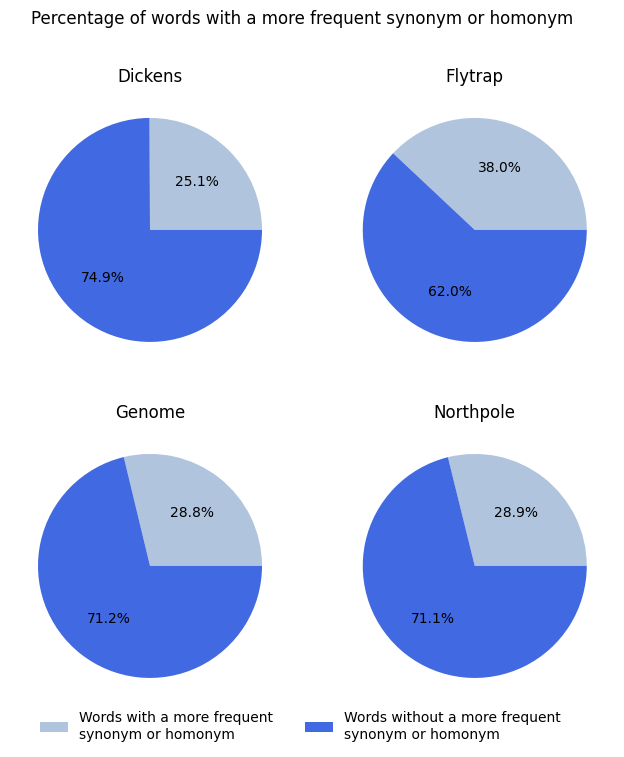

In [ ]:
# Graph for percentage of words with more frequent synonym/homonym
# Calculate the percentages for each pie chart
dickens_pct = df_dickens['synonym_homonym'].value_counts()[True] / int(df_dickens['t_n_words'].unique()[0])
flytrap_pct = df_flytrap['synonym_homonym'].value_counts()[True] / int(df_flytrap['t_n_words'].unique()[0])
genome_pct = df_genome['synonym_homonym'].value_counts()[True] / int(df_genome['t_n_words'].unique()[0])
northpole_pct = df_northpole['synonym_homonym'].value_counts()[True] / int(df_northpole['t_n_words'].unique()[0])

# Create a grid of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Create the first pie chart in the top-left subplot with color change
dickens_pct = df_dickens['synonym_homonym'].value_counts(normalize=True)[True]
axes[0, 0].pie([dickens_pct, 1-dickens_pct], colors=['lightsteelblue', 'royalblue'], autopct='%1.1f%%')
axes[0, 0].set_title('Dickens')

# Create the second pie chart in the top-right subplot with color change
flytrap_pct = df_flytrap['synonym_homonym'].value_counts(normalize=True)[True]
axes[0, 1].pie([flytrap_pct, 1-flytrap_pct], colors=['lightsteelblue', 'royalblue'], autopct='%1.1f%%')
axes[0, 1].set_title('Flytrap')

# Create the third pie chart in the bottom-left subplot with color change
genome_pct = df_genome['synonym_homonym'].value_counts(normalize=True)[True]
axes[1, 0].pie([genome_pct, 1-genome_pct], colors=['lightsteelblue', 'royalblue'], autopct='%1.1f%%')
axes[1, 0].set_title('Genome')

# Create the fourth pie chart in the bottom-right subplot with color change
northpole_pct = df_northpole['synonym_homonym'].value_counts(normalize=True)[True]
axes[1, 1].pie([northpole_pct, 1-northpole_pct], colors=['lightsteelblue', 'royalblue'], autopct='%1.1f%%')
axes[1, 1].set_title('Northpole')

fig.subplots_adjust(wspace=0.1)
# Add a common title for the entire plot
fig.suptitle('Percentage of words with a more frequent synonym or homonym')

# Add a legend at the bottom of the plot
legend_labels = ['Words with a more frequent \nsynonym or homonym', "Words without a more frequent \nsynonym or homonym"]
legend_colors = ['lightsteelblue', 'royalblue']
fig.legend(labels=legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, 0.05), frameon=False)



##Surprisal

In [ ]:
df.groupby('text_number')[['synt_surprisal', 'surprisal_bert']].describe()

synt_surprisal                                             \
                     count      mean       std  min      25%      50%   
text_number                                                             
1                    634.0  0.032755  0.262530 -0.0  0.00006  0.00016   
2                    700.0  0.021214  0.205842  0.0  0.00005  0.00018   
3                    591.0  0.036837  0.274479  0.0  0.00006  0.00024   
4                    558.0  0.010449  0.053417 -0.0  0.00005  0.00015   

                               surprisal_bert                                \
                  75%      max          count      mean       std       min   
text_number                                                                   
1            0.000567  3.67163          634.0  4.554461  3.403591  0.003920   
2            0.000790  3.67163          700.0  5.272620  3.849307  0.000360   
3            0.001525  3.67163          591.0  5.481489  4.496956  0.001780   
4            0.000600  0.52654          558.0  5.189576  3.576448  0.003173   

                                                      
                  25%       50%       75%        max  
text_number                                           
1            1.924125  3.824577  6.474626  19.570946  
2            2.009906  4.625924  8.001030  21.285225  
3            1.923560  4.495569  7.796248  29.840946  
4            2.261587  4.455662  7.522698  16.407284

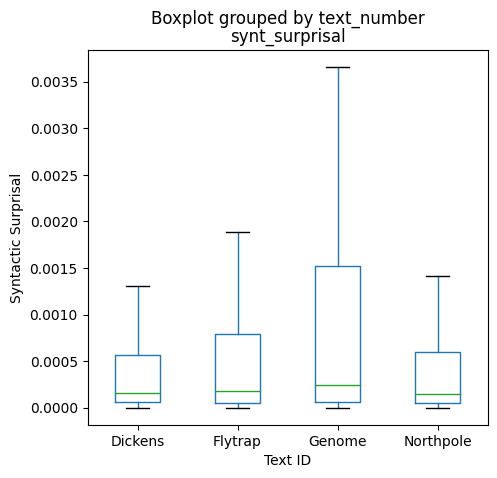

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a box plot for syntactic_surprisal
ax = df.boxplot(column='synt_surprisal', by='text_number', figsize=(5, 5), showfliers=False)

ax.set_xlabel('Text ID')
ax.set_ylabel('Syntactic Surprisal')
ax.grid(False)

labels = ['Dickens', 'Flytrap', 'Genome', 'Northpole']
ax.set_xticklabels(labels)
# Show the plot

fig.suptitle('Syntactic Surprisal')
plt.show()


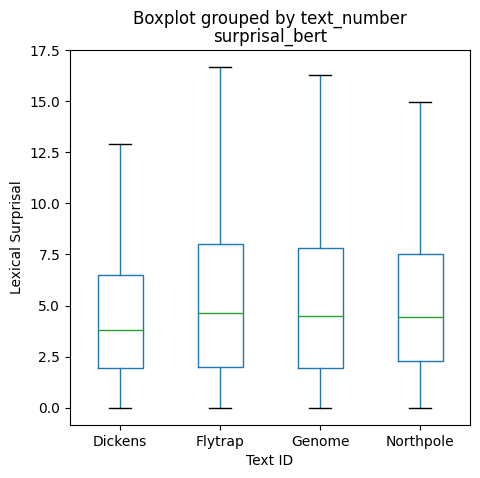

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for lexical surprisal
ax = df.boxplot(column='surprisal_bert', by='text_number', figsize=(5, 5), showfliers=False)

ax.set_xlabel('Text ID')
ax.set_ylabel('Lexical Surprisal')
ax.grid(False)
# Change x-axis labels
labels = ['Dickens', 'Flytrap', 'Genome', 'Northpole']
ax.set_xticklabels(labels)

# Show the plot
plt.show()

##Deps

In [ ]:
print("Number of deps on right/left")
df.groupby('text_number')[['n_rights', "n_lefts"]].describe()

Number of deps on right/left


n_rights                                              n_lefts  \
               count      mean       std  min  25%  50%  75%  max   count   
text_number                                                                 
1              634.0  0.539432  1.028438  0.0  0.0  0.0  1.0  7.0   634.0   
2              700.0  0.482857  0.866475  0.0  0.0  0.0  1.0  7.0   700.0   
3              591.0  0.575296  0.940969  0.0  0.0  0.0  1.0  5.0   591.0   
4              558.0  0.560932  0.976775  0.0  0.0  0.0  1.0  6.0   558.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
text_number                                               
1            0.515773  0.962440  0.0  0.0  0.0  1.0  8.0  
2            0.567143  0.937110  0.0  0.0  0.0  1.0  6.0  
3            0.509306  0.894142  0.0  0.0  0.0  1.0  5.0  
4            0.487455  0.888195  0.0  0.0  0.0  1.0  5.0

In [ ]:
df.groupby('text_number')['dep_distance'].describe()

,count,mean,std,min,25%,50%,75%,max
text_number,,,,,,,,
1,634.0,0.503155,3.952421,-20.0,-1.0,0.0,2.0,26.0
2,700.0,0.161429,4.496503,-23.0,-1.0,-1.0,2.0,52.0
3,591.0,0.263959,3.441724,-21.0,-1.0,0.0,2.0,20.0
4,558.0,0.333333,3.844369,-32.0,-1.0,0.0,2.0,27.0


##Semantics

In [ ]:
print("Semantic similarity: ")
df.groupby('text_number')['semantic_similarity_adjacent_sent'].describe()

Semantic similarity: 


,count,mean,std,min,25%,50%,75%,max
text_number,,,,,,,,
1,634.0,27.037855,14.993368,3.0,14.0,23.0,34.0,59.0
2,700.0,27.700000,9.496103,2.0,20.0,29.0,36.0,42.0
3,591.0,21.189509,9.079571,1.0,14.0,20.0,29.0,40.0
4,558.0,25.419355,12.178495,2.0,16.0,22.0,35.0,45.0


In [ ]:
df['semantic_similarity_adjacent_sent'].head()

0    11
1    11
2    11
3    11
4    11
Name: semantic_similarity_adjacent_sent, dtype: int64

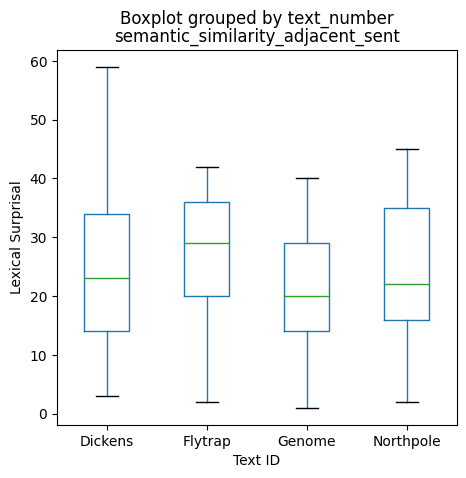

In [ ]:
# Create a box plot for lexical surprisal
ax = df.boxplot(column='semantic_similarity_adjacent_sent', by='text_number', figsize=(5, 5), showfliers=False)

ax.set_xlabel('Text ID')
ax.set_ylabel('Lexical Surprisal')
ax.grid(False)
# Change x-axis labels
labels = ['Dickens', 'Flytrap', 'Genome', 'Northpole']
ax.set_xticklabels(labels)

# Show the plot
plt.show()

##Lexical density, lexical overlap, ttr

In [ ]:
print("lexical density text: ")
print("Dickens: ", df_dickens['t_lexical_density'].unique()[0])
print("Flytrap: ", df_flytrap['t_lexical_density'].unique()[0])
print("Genome: ", df_genome['t_lexical_density'].unique()[0])
print("Northpole: ", df_northpole['t_lexical_density'].unique()[0])
print("Lexical density sentences: ")
df.groupby('text_number')['sent_lexical_density_tokens'].describe()

lexical density text: 
Dickens:  0.4432
Flytrap:  0.5559
Genome:  0.5778
Northpole:  0.4306
Lexical density sentences: 


,count,mean,std,min,25%,50%,75%,max
text_number,,,,,,,,
1,634.0,0.444797,0.090048,0.230769,0.400000,0.440678,0.500000,0.666667
2,700.0,0.547142,0.049515,0.411765,0.529412,0.555556,0.575342,0.800000
3,591.0,0.575295,0.109610,0.400000,0.481481,0.548387,0.645161,0.888889
4,558.0,0.430107,0.081567,0.250000,0.377778,0.437500,0.481481,0.600000


In [ ]:
# number of sentences in text
n_sent_dickens = df_dickens.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
n_sent_flytrap = df_flytrap.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
n_sent_genome = df_genome.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
n_sent_northpole = df_northpole.groupby(['text_number', 'screen_number'])['sentence_number'].nunique().sum()
print("Dickens: ", n_sent_dickens)
print("Flytrap: ", n_sent_flytrap)
print("Genome: ", n_sent_genome)
print("Northpole: ", n_sent_northpole)

Dickens:  33
Flytrap:  31
Genome:  37
Northpole:  33


In [ ]:
# Number of sentences that have lexical overlap
lex_overlap_dickens = df_dickens.groupby(['text_number', 'screen_number'])['lex_overlap'].nunique().sum()
lex_overlap_flytrap = df_flytrap.groupby(['text_number', 'screen_number'])['lex_overlap'].nunique().sum()
lex_overlap_genome = df_genome.groupby(['text_number', 'screen_number'])['lex_overlap'].nunique().sum()
lex_overlap_northpole = df_northpole.groupby(['text_number', 'screen_number'])['lex_overlap'].nunique().sum()
print("No sent with lex overlap: ")
print("Dickens: ", lex_overlap_dickens)
print("Flytrap: ", lex_overlap_flytrap)
print("Genome: ", lex_overlap_genome)
print("Northpole: ", lex_overlap_northpole)

No sent with lex overlap: 
Dickens:  10
Flytrap:  12
Genome:  11
Northpole:  10


In [ ]:
# ratio
print("Dickens: % of sent with lexical overlap; ", lex_overlap_dickens/n_sent_dickens)
print("Flytrap: % of sent with lexical overlap; ", lex_overlap_flytrap/n_sent_flytrap)
print("Genome: % of sent with lexical overlap; ", lex_overlap_genome/n_sent_genome)
print("Northpole: % of sent with lexical overlap; ", lex_overlap_northpole/n_sent_northpole)

Dickens: % of sent with lexical overlap;  0.30303030303030304
Flytrap: % of sent with lexical overlap;  0.3870967741935484
Genome: % of sent with lexical overlap;  0.2972972972972973
Northpole: % of sent with lexical overlap;  0.30303030303030304


##TTR: Token-type-ratio

In [ ]:
# group by text_id and select the desired columns
df.groupby('text_number')[['t_lemma_TTR', 't_content_w_TTR', 't_function_w_TTR',
                                 't_nouns_TTR', 't_verbs_TTR', 't_adj_TTR', 't_adv_TTR']].first()

,t_lemma_TTR,t_content_w_TTR,t_function_w_TTR,t_nouns_TTR,t_verbs_TTR,t_adj_TTR,t_adv_TTR
text_number,,,,,,,
1,0.4650,0.7018,0.1786,0.7353,0.6630,0.8000,0.7941
2,0.4498,0.5496,0.1779,0.4444,0.6429,0.6667,0.8519
3,0.5397,0.6934,0.1706,0.6802,0.7500,0.7037,0.7917
4,0.5333,0.8285,0.2054,0.8542,0.7321,0.8667,0.9000


##tfidf

In [ ]:
df.groupby('text_number')[['tf', 'idf', 'tf_idf']].first()

,tf,idf,tf_idf
text_number,,,
1,0.0909,2.8034,0.2548
2,0.0588,0.1759,0.0103
3,0.0417,2.5123,0.1048
4,0.1250,1.7047,0.2131


##active/passive

In [ ]:
def get_voice_scores(df, n_sent):
  # count the number of unique sentence_number values per text, screen, and voice
  counts = df.groupby(['text_number', 'screen_number', 'voice'])['sentence_number'].nunique()

  # group by text and voice, and sum the counts for each voice
  summary_counts = counts.groupby(['text_number', 'voice']).sum()

  # extract the counts for active and passive voice
  active_count = int(summary_counts.loc[(slice(None), 'active')])
  passive_count = int(summary_counts.loc[(slice(None), 'passive')])
  ratio = round(passive_count/n_sent, 4)

  return active_count, passive_count, ratio

In [ ]:
# active and passive voice
print("Dickens: ")
print("Active voice sentences: ", get_voice_scores(df_dickens, n_sent_dickens)[0], "\nPassive voice sentences: ", get_voice_scores(df_dickens, n_sent_dickens)[1], "\nRatio: ", get_voice_scores(df_dickens, n_sent_dickens)[2])

print("\nFlytrap: ")
print("Active voice sentences: ", get_voice_scores(df_flytrap, n_sent_flytrap)[0], "\nPassive voice sentences: ", get_voice_scores(df_flytrap, n_sent_flytrap)[1], "\nRatio: ", get_voice_scores(df_flytrap, n_sent_flytrap)[2])

print("\nGenome: ")
print("Active voice sentences: ", get_voice_scores(df_genome, n_sent_genome)[0], "\nPassive voice sentences: ", get_voice_scores(df_genome, n_sent_genome)[1], "\nRatio: ", get_voice_scores(df_genome, n_sent_genome)[2])

print("\nNorthpole: ")
print("Active voice sentences: ", get_voice_scores(df_northpole, n_sent_northpole)[0], "\nPassive voice sentences: ", get_voice_scores(df_northpole, n_sent_northpole)[1], "\nRatio: ", get_voice_scores(df_northpole, n_sent_northpole)[2])


Dickens: 
Active voice sentences:  29 
Passive voice sentences:  4 
Ratio:  0.1212

Flytrap: 
Active voice sentences:  25 
Passive voice sentences:  6 
Ratio:  0.1935

Genome: 
Active voice sentences:  29 
Passive voice sentences:  8 
Ratio:  0.2162

Northpole: 
Active voice sentences:  30 
Passive voice sentences:  3 
Ratio:  0.0909


##sentence cut off at the end of the screen?

In [ ]:
print("Dickens: ")
print("Number of screens: ", len(df_dickens['screen_number'].unique()))
print("Number of screen in which the last sentence is cut off: ", len(df_dickens.loc[df_dickens['sent_cut'] == 1, 'screen_number'].unique()))
print("Flytrap: ")
print("Number of screens: ", len(df_flytrap['screen_number'].unique()))
print("Number of screen in which the last sentence is cut off: ", len(df_flytrap.loc[df_flytrap['sent_cut'] == 1, 'screen_number'].unique()))
print("Genome: ")
print("Number of screens: ", len(df_genome['screen_number'].unique()))
print("Number of screen in which the last sentence is cut off: ", len(df_genome.loc[df_genome['sent_cut'] == 1, 'screen_number'].unique()))
print("Northpole: ")
print("Number of screens: ", len(df_northpole['screen_number'].unique()))
print("Number of screen in which the last sentence is cut off: ", len(df_northpole.loc[df_northpole['sent_cut'] == 1, 'screen_number'].unique()))

Dickens: 
Number of screens:  5
Number of screen in which the last sentence is cut off:  3
Flytrap: 
Number of screens:  6
Number of screen in which the last sentence is cut off:  4
Genome: 
Number of screens:  6
Number of screen in which the last sentence is cut off:  5
Northpole: 
Number of screens:  5
Number of screen in which the last sentence is cut off:  3


##Genre

In [ ]:
df.groupby('text_number')[['t_genre']].first()

,t_genre
text_number,
1,fiction
2,scientific
3,scientific
4,fiction
